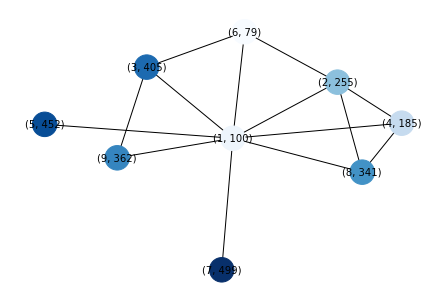

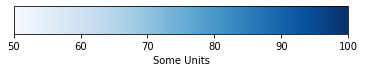

In [8]:
import networkx as nx
from random import randint
import numpy as np
from matplotlib import colors, pyplot as plt
from math import sin, cos, pi, e
%matplotlib inline
size = 250 # resolution

G = nx.Graph()

G.add_nodes_from([
    (1,100),(2,255),(3,405)
])

H = nx.path_graph([(x, randint(50,500)) for x in range(4,10)])
G.add_nodes_from(H)
# adding edges

G.add_edges_from([(x,y) for x in list(G.nodes()) for y in list(G.nodes()) if x[0]!=y[0] and x[0] % y[0] < 1])
color_values = [x[1] for x in G.nodes()]

# pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, with_labels=True, font_size = 10,node_color = color_values, cmap = plt.cm.Blues ,node_size=600)

fig, ax = plt.subplots(figsize=(6,1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.cm.Blues
norm = colors.Normalize(vmin=50, vmax=100)

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')

NodeView(((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2)))

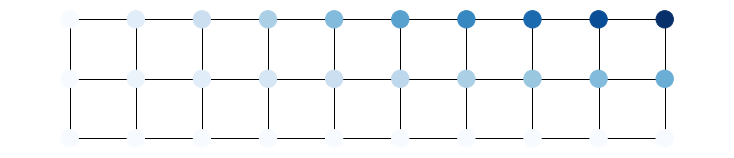

In [9]:
G = nx.grid_graph([3,10])
magnitude = [x*y for x,y in G.nodes()]

plt.figure(figsize=(10,2))
position = {(x,y):(x,y) for x,y in G.nodes()}
nx.draw(G, pos = position, node_color = magnitude , cmap = plt.cm.Blues)
G.nodes()

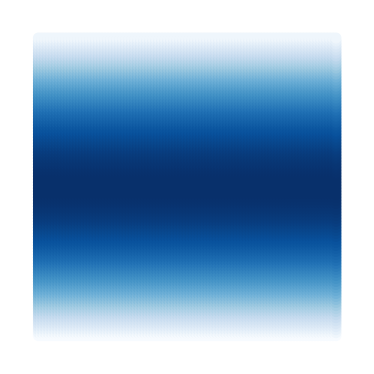

In [10]:
n = 100

G = nx.grid_graph([n,n])
magnitude = [-(n//2-y)**2  for x,y in G.nodes()]
# direction = [tan(x*y) for x,y in G.nodes()]

plt.figure(figsize=(5,5))
position = {(x,y):(x,y) for x,y in G.nodes()}

nx.draw(G, pos = position, node_color = magnitude , cmap = plt.cm.Blues, node_size=100)


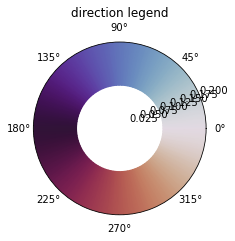

In [11]:
# color wheel plot

fg = plt.figure(figsize=(3,3))
ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')
plt.title("direction legend")
norm = colors.Normalize(0, 2*np.pi) 

# n = 100  #the number of secants for the mesh
t = np.linspace(0,2*np.pi,n)   #theta values
r = np.linspace(.1,.2,2)        #radius values change 0.6 to 0 for full circle
rg, tg = np.meshgrid(r,t)      #create a r,theta meshgrid
c = tg                         #define color values as theta value
im = ax.pcolormesh(t, r, c.T, cmap=plt.cm.twilight,norm=norm, shading="gouraud")  #plot the colormesh on axis with colormap

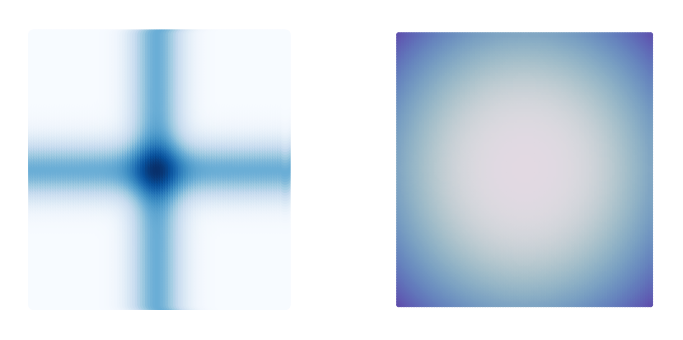

In [14]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# magnitude plot

G = nx.grid_graph([n,n])
magnitude = [e**(-(x-n/2)**2/n)+e**(-(y-n/2)**2/n)  for x,y in G.nodes()]
# magnitude = [(x/2-y)**2   for x,y in G.nodes()]
mvmin, mvmax = min(magnitude), max(magnitude)

position = {(x,y):(x,y) for x,y in G.nodes()}
nx.draw(G, pos = position, node_color = magnitude , cmap = plt.cm.Blues, node_size=100,ax=ax1)

# direction plot

H = nx.grid_graph([n,n])
# direction = [sin(x/(n/2)-y/(n/2)) for x,y in H.nodes()]
# direction = [pi/4 for x,y in H.nodes()]
direction = [((x-size/2)/(size/2))**2 + ((y-size/2)/(size/2))**2 for x,y in H.nodes()]

position = {(x,y):(x,y) for x,y in H.nodes()}
nx.draw(H, pos = position, node_color = direction, cmap = plt.cm.twilight, vmin=0, vmax=2*pi,node_size=20,ax=ax2)

np_mag = np.array(magnitude).reshape(size, size)
np_dir = np.array(direction).reshape(size, size)


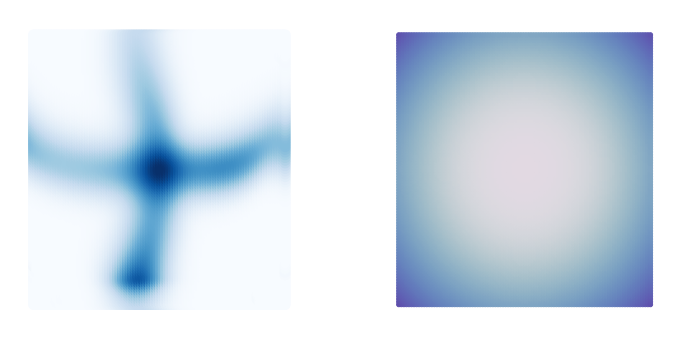

In [28]:
size = int(np.sqrt(len(magnitude))) # size of grid
transfer_rate = 1 # percentage of magnitude transferred in one step.

np_new_mag = np.zeros((size,size))

# single iteration with vector updates, ignoring boundary updates

# calculate flow for (row,col)
for row in range(size):
    for col in range(size):
        # w_1 = abs(transfer_rate * np_mag[row,col] * sin(np_dir[row, col]))
        # w_2 = abs(transfer_rate * np_mag[row,col] * cos(np_dir[row, col]))
        w_1 = abs(abs(np_dir[row,col]) * np_mag[row,col] * sin(np_dir[row, col]))
        w_2 = abs(abs(np_dir[row,col]) * np_mag[row,col] * cos(np_dir[row, col]))
        np_mag[row,col] -= transfer_rate * (abs(w_1)+abs(w_2))

        # print(transfer_rate * np_mag[row,col]==w_2)
        
        # which nodes the magnitude flows out to
        if(0 <= np_dir[row, col] < pi/2):      
            np_new_mag[row, (col + 1) % size] += (w_1)
            np_new_mag[(row - 1) % size, col] += (w_2)
        elif(pi/2 <= np_dir[row, col] < pi):   
            np_new_mag[(row - 1) % size, col] += (w_1)
            np_new_mag[row, (col - 1) % size] += (w_2)
        elif(pi <= np_dir[row, col] < (3.0/2.0) * pi):
            np_new_mag[row, (col - 1) % size] += (w_1)
            np_new_mag[(row + 1) % size, col] += (w_2)
        else:                                  
            np_new_mag[(row + 1) % size, col] += (w_1)
            np_new_mag[row, (col + 1) % size] += (w_2)
        
np_mag += np_new_mag

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# magnitude plot

magnitude = np_mag.flatten()

position = {(x,y):(x,y) for x,y in G.nodes()}
nx.draw(G, pos = position, node_color = magnitude , cmap = plt.cm.Blues, node_size=100,ax=ax1, vmin = mvmin, vmax = mvmax)

# direction plot

direction = np_dir.flatten()

position = {(x,y):(x,y) for x,y in H.nodes()}
nx.draw(H, pos = position, node_color = direction, cmap = plt.cm.twilight, vmin=0, vmax=2*pi, node_size=20,ax=ax2)
            
